# Lecture 2: Parametric Families

## Learning Goals

- Calculate expectations of a linear combination of random variables.
- Match a physical process to a distribution family (Binomial, Geometric, Negative Binomial, Poisson, and Bernoulli). 
- Calculate probabilities, mean, and variance of a distribution belonging to a distribution family.
- Find the probability mass function of a random variable transformation, e.g., $X^2$.
- Distinguish between a family of distributions and a distribution.
- Identify whether a specification of parameters (such as mean and variance) is enough/too little/too much to specify a distribution from a family of distributions.

## 1. Properties of Distributions

We must start getting familiar with central tendency and uncertainty measures from {doc}`01_lecture-uncertainty`. Hence, let us practice their computations with some in-class iClicker exercises.

### 1.1. A Single Probability Mass Function 

Suppose $X$ is a discrete random variable denoting the following:

$$X = \text{Number of crabs found at a nest in a Mexican beach.}$$

``` {figure} img/crab.png
:height: 350px
:name: crab
A crab
```

Its probability mass function (PMF) is given by {numref}`pmf-crabs`.

```{list-table} Probability mass function (PMF) of count-type random variable $X$
:header-rows: 1
:name: pmf-crabs

* - $X$
  - $P(X = x)$
* - 0
  - 0.4
* - 1
  - 0.1
* - 2
  - 0.1
* - 3
  - 0.4
```

Then, we plot this PMF as a **bar chart**:

In [1]:
library(tidyverse)
library(cowplot)

── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘cowplot’


The following object is masked from ‘package:lubridate’:

    stamp




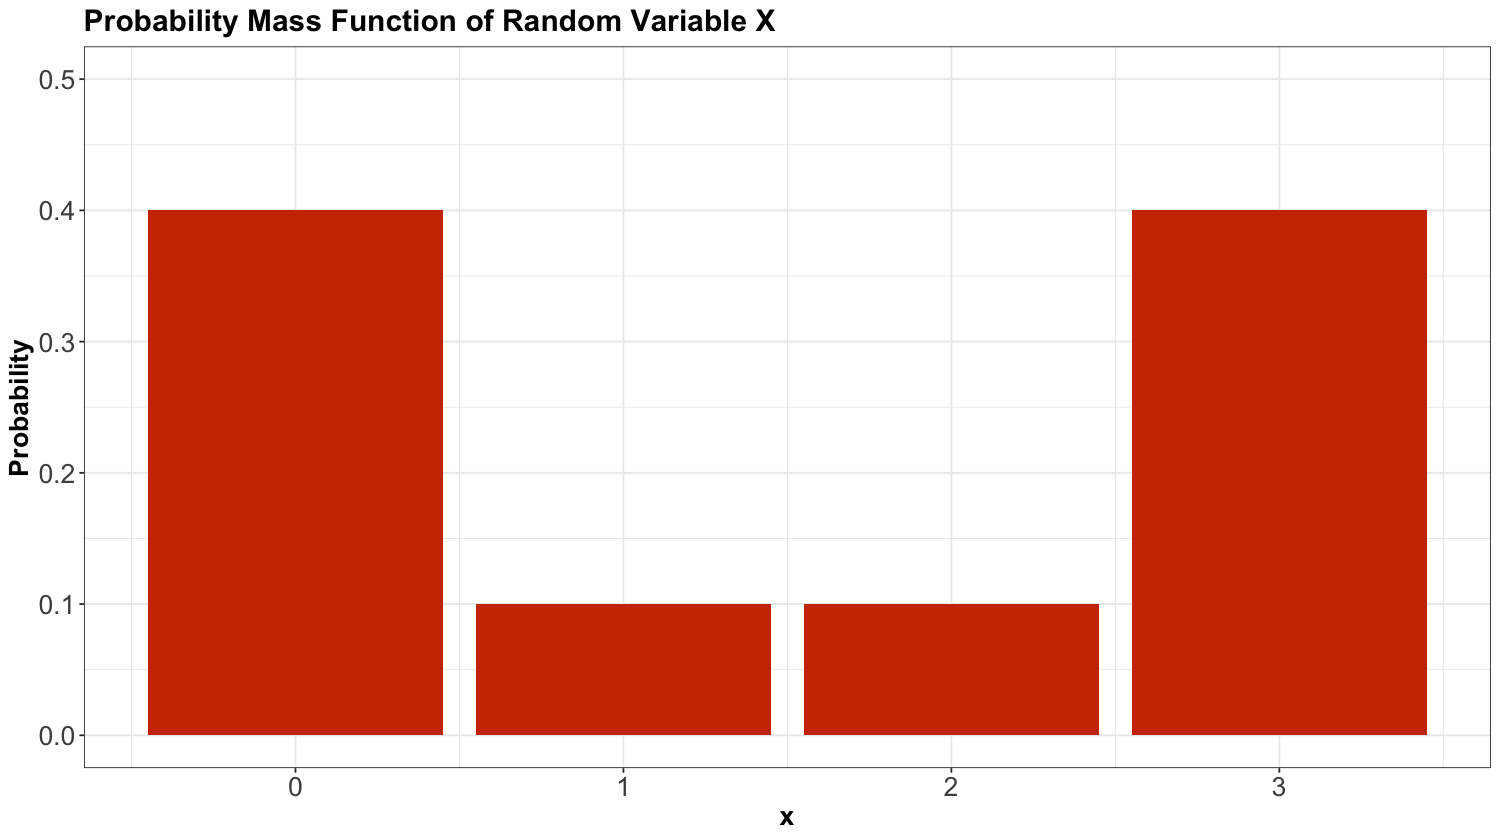

In [2]:
options(repr.plot.width = 12.5)

tibble(x = 0:3, p = c(0.4, 0.1, 0.1, 0.4)) %>%
  ggplot(aes(x, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  ggtitle("Probability Mass Function of Random Variable X")

Now, let us start with some in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture2-q1

Using the {numref}`pmf-crabs` for random variable $X$, compute $\mathbb{E}(X)$. Select the correct option:

**A.** 1

**B.** 1.5

**C.** 1.9

**D.** 6
```

```{exercise}
:label: lecture2-q2

Using the {numref}`pmf-crabs` for random variable $X$, compute the variance $\text{Var}(X)$. Select the correct option:

**A.** 2.6

**B.** 1.85

**C.** 4.1

**D.** -1.85
```

```{exercise}
:label: lecture2-q3

Using the {numref}`pmf-crabs` for random variable $X$, obtain the mode $\text{Mode}(X)$. Select the correct option:

**A.** 0

**B.** 3

**C.** Both 0 and 3

**D.** Neither
```

```{exercise}
:label: lecture2-q4

Using the {numref}`pmf-crabs` for random variable $X$, obtain the entropy $H(X)$. Select the correct option:

**A.** -1.19

**B.** 0.52

**C.** -0.52

**D.** 1.19
```

### 1.2. Comparing Multiple Probability Mass Functions

Now, suppose there are four different random variables related to four Mexican beaches:

```{math}
\begin{gather*}
U =  \text{Number of crabs found at a nest in a beach at Acapulco.} \\
V =  \text{Number of crabs found at a nest in a beach at Cabo San Lucas.} \\
W =  \text{Number of crabs found at a nest in a beach at Cancún.} \\
Y =  \text{Number of crabs found at a nest in a beach at Puerto Vallarta.}
\end{gather*}
```
``` {figure} img/cancun.jpg
:height: 350px
:name: cancun
Cancún
```

Their corresponding PMFs are:

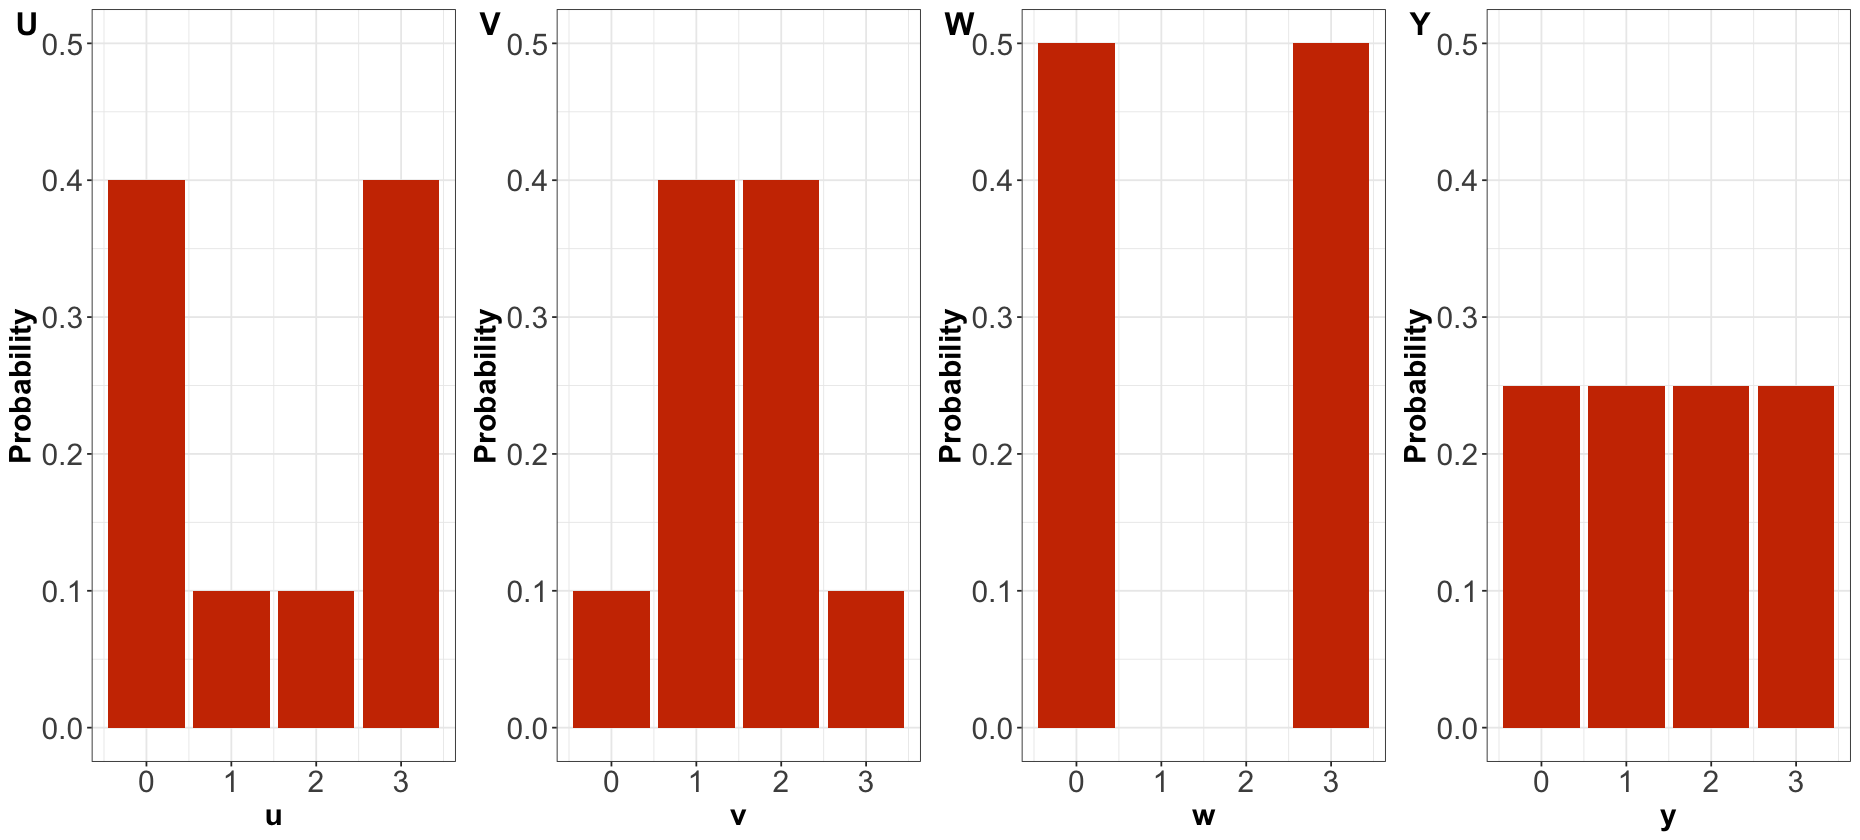

In [3]:
options(repr.plot.width = 15.5)

PMF_U <- tibble(u = 0:3, p = c(0.4, 0.1, 0.1, 0.4)) %>%
  ggplot(aes(u, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 19, face = "bold"),
    axis.text = element_text(size = 18),
    axis.title = element_text(size = 18, face = "bold"))
PMF_V <- tibble(v = 0:3, p = c(0.1, 0.4, 0.4, 0.1)) %>%
  ggplot(aes(v, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 19, face = "bold"),
    axis.text = element_text(size = 18),
    axis.title = element_text(size = 18, face = "bold"))
PMF_W <- tibble(w = 0:3, p = c(0.5, 0, 0, 0.5)) %>%
  ggplot(aes(w, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 19, face = "bold"),
    axis.text = element_text(size = 18),
    axis.title = element_text(size = 18, face = "bold"))
PMF_Y <- tibble(y = 0:3, p = c(0.25, 0.25, 0.25, 0.25)) %>%
  ggplot(aes(y, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 19, face = "bold"),
    axis.text = element_text(size = 18),
    axis.title = element_text(size = 18, face = "bold"))
(cowplot::plot_grid(PMF_U, PMF_V, PMF_W, PMF_Y,
  nrow = 1, labels = c("U ", "V ", "W", "Y "), label_size = 19
))

Let us continue with some other in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture2-q5

Answer **TRUE** or **FALSE**:

**By only looking at the PMFs**, $U$ has higher entropy than $V$. 

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture2-q6

Answer **TRUE** or **FALSE**:

**By only looking at the PMFs**, $U$ has higher variance than $V$.

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture2-q7

Answer **TRUE** or **FALSE**:

**By only looking at the PMFs**, $W$ has the highest variance amongst the four distributions.

**A.** TRUE

**B.** FALSE
```

```{exercise}
:label: lecture2-q8

Answer **TRUE** or **FALSE**:

**By only looking at the PMFs**, $Y$ has the highest entropy amongst the four distributions.

**A.** TRUE

**B.** FALSE
```

## 2. Random Variable Transformations 

A fundamental characteristic of a random variable is that it can be turned into other random variables via mathematical transformations. This characteristic is crucial in data modelling since we can easily adjust random variables to find proper estimation and inference methods.

### 2.1. Revisiting Variance

In {ref}`mean-and-variance`, we checked the formula for the variance of a random variable $X$ in two forms:

1. $\text{Var}(X) =  \mathbb{E}\{[X - \mathbb{E}(X)]^2\}$, or alternatively
2. $\text{Var}(X) =  \mathbb{E}(X^2) - [\mathbb{E}(X)]^2$.

Given that $\mathbb{E}(X)$ is the mean of the random variable, the form in (1) is more intuitive to grasp the variance concept: **it is the squared deviation of the random variable $X$ to its mean**. On the other hand, (2) is handier for mathematical manipulations **involving expected value properties**.

Now, using both methods to calculate the variance as depicted earlier with {numref}`pmf-crabs`, we can calculate the variance of $X$ as follows:

#### Method 1

```{math}
\begin{align*}
\text{Var}(X) &= \mathbb{E}\{[X - \mathbb{E}(X)]^2\} \\
&= \mathbb{E}[(X - 1.5)^2] \qquad \qquad \text{since } \mathbb{E}(X) = 1.5 \\ 
&= (-1.5)^2(0.4) + (-0.5)^2(0.1) + (0.5)^2(0.1) + (1.5)^2(0.4) \\ 
&= 1.85.
\end{align*}
```

#### Method 2

```{math}
\begin{align*}
\text{Var}(X) &= \mathbb{E}(X^2) - [\mathbb{E}(X)]^2 \\
&= \mathbb{E}(X^2) - (1.5)^2 \qquad \qquad \text{since } \mathbb{E}(X) = 1.5 \\ 
&= (0)^2(0.4) + (1)^2(0.1) + (2)^2(0.1) + (3)^2(0.4) - (1.5)^2 \\ 
&= 1.85.
\end{align*}
```

### 2.2. Distribution Mapping

For the sake of the topic of random variable transformations, let us focus the attention on the expected value $\mathbb{E}(X^2)$ for the random variable 

$$X = \text{Number of crabs found at a nest in a Mexican beach}$$

whose PMF is defined in {numref}`pmf-crabs`.

More specifically, what does $X^2$ mean? It comes down to what we define in Statistics as a **random variable transformation**. First, it is essential to clarify that $X^2$ will be a new transformed random variable that takes on the squares of the values of $X$. However, **their distributions are different** .

In this class of matters, we usually rename our transformed variable. For example: 

$$Z = X^2.$$

Moreover, let us revisit the PMF from earlier for $X$, calling it $P(X)$:

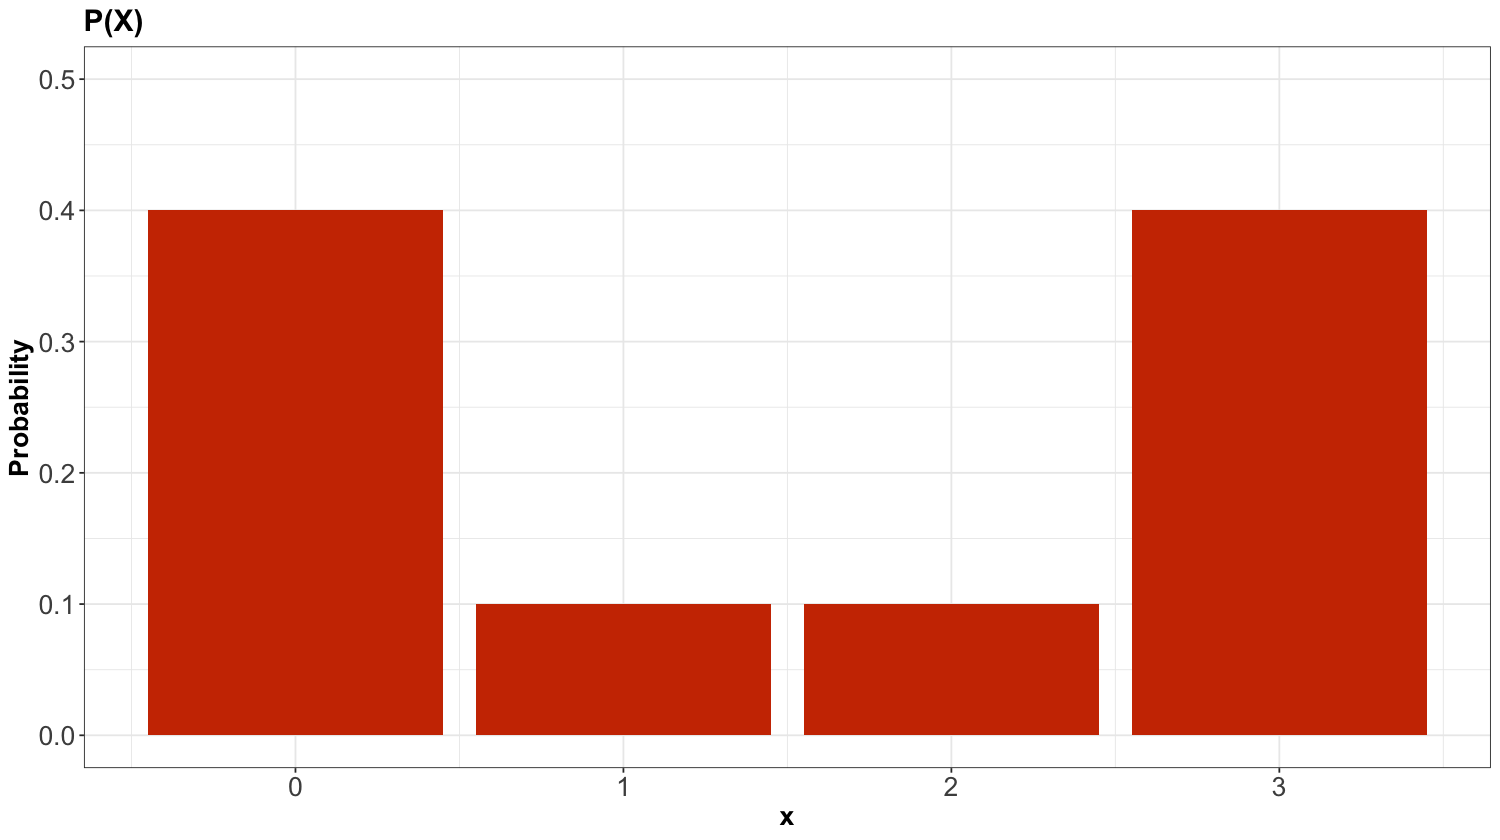

In [4]:
options(repr.plot.width = 12.5)

tibble(x = 0:3, p = c(0.4, 0.1, 0.1, 0.4)) %>%
  ggplot(aes(x, p)) +
  geom_col(fill = "orangered3") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  ggtitle("P(X)")

To obtain the PMF of $Z = X^2$, we basically need to map the possible values of $Z$ **while still keeping the same probabilities!** This is a crucial point in random variable transformation. Therefore, the previous PMF for $X$ becomes for $Z$ as:

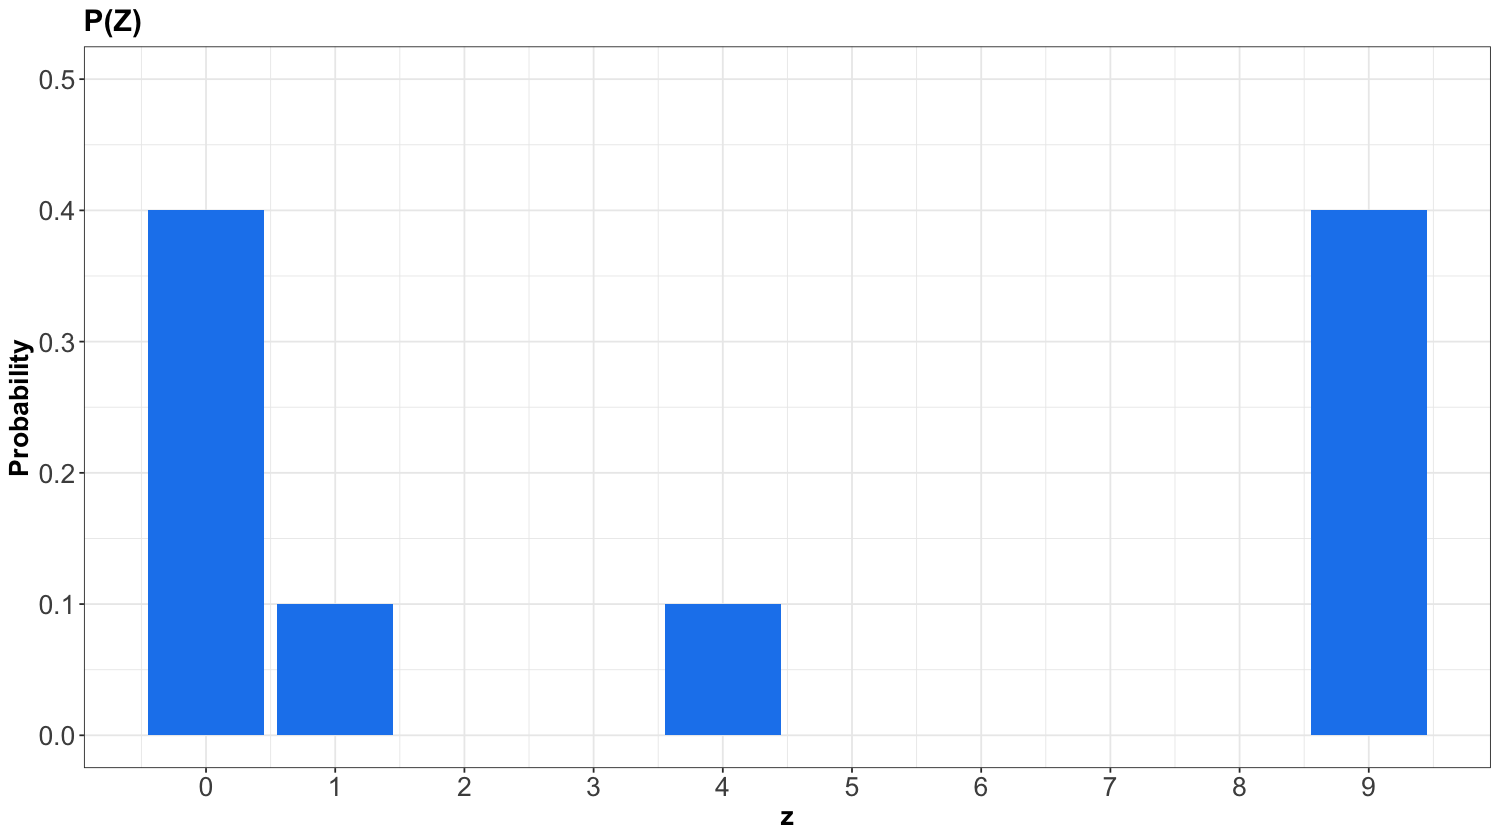

In [5]:
(p1 <- tibble(z = 0:9, p = c(0.4, 0.1, 0, 0, 0.1, 0, 0, 0, 0, 0.4)) %>%
  ggplot(aes(z, p)) +
  geom_col(fill = "dodgerblue2") +
  theme_bw() +
  ylab("Probability") +
  ylim(0, 0.5) +
  theme(plot.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  ggtitle("P(Z)")) +
  scale_x_continuous(breaks = 0:9)

```{important} 
Even though we keep the same probabilities in $P(Z)$, note that the values on the horizontal axis correspond to the squared outcomes of $X$.
```

Just as in {numref}`pmf-crabs`, the PMF of $Z$ can be put as a table:

```{list-table} Probability mass function (PMF) of count-type random variable $Z$
:header-rows: 1
:name: pmf-z

* - $Z$
  - $P(Z = z)$
* - 0
  - 0.4
* - 1
  - 0.1
* - 4
  - 0.1
* - 9
  - 0.4
```

```{important} 
We already clarified that random variables are denoted in uppercase. Nonetheless, once we **observe** a specific outcome of a given random variable, we use lowercase.
```

### 2.3. Expected Value Properties

Expected values have certain useful properties. For instance, we can calculate them under **linear random variable transformations**. 

````{admonition} Definition of Linearity of Expectations
:class: tip
If $a$ and $b$ are constants, with $X$ and $Y$ as random variables, then we can obtain the expected value of the following expressions as:

```{math}
\begin{gather*}
\mathbb{E}(a X) = a \mathbb{E}(X) \\
\mathbb{E}(X + Y) = \mathbb{E}(X) + \mathbb{E}(Y) \\
\mathbb{E}(aX + bY) = a\mathbb{E}(X) + b\mathbb{E}(Y).
\end{gather*}
```
````

```{important} 
Let us be cautious with the mathematical manipulations of the expected value operator $\mathbb{E}(\cdot)$. **It does not follow the usual algebraic rules**. For instance, if no further assumptions are made for random variables $X$ and $Y$, then

$$\mathbb{E}(XY) \neq \mathbb{E}(X)\mathbb{E}(Y).$$

Moreover, note the following:

$$\mathbb{E}(X^2) \neq [\mathbb{E}(X)]^2.$$
```

### 2.4. Variance Properties

The variance also has important properties in terms of **linear random variable transformations**.


````{admonition} Definition of Linearity of Variance for Independent Random Variables
:class: tip
If $a$ and $b$ are constants, with $X$ and $Y$ as independent random variables, then we can obtain the variance of the following expressions as:

```{math}
\begin{gather*}
\text{Var}(a X) = a^2 \text{Var}(X) \\
\text{Var}(X + Y) = \text{Var}(X) + \text{Var}(Y) \\
\text{Var}(aX + bY) = a^2 \text{Var}(X) + b^2 \text{Var}(Y).
\end{gather*}
```
````

## 3. Distribution of Families

So far, we have discussed the properties of probability distributions in general. Again, this is important because a huge component of Data Science is to model data as random variables with uncertain outcomes. For instance:

- The number of ships that arrive at the port of Vancouver on a given day (i.e., a discrete and count random variable).
- A rock type (i.e., a discrete and categorical random variable).

Certain variables in common random processes give rise to probability distributions having a particular form, and these distributions are very useful in data modelling (e.g., regression analysis). The world of statistical distributions is vast. In the case of **univariate distributions** (i.e., a single random variable), [this resource](http://www.math.wm.edu/~leemis/chart/UDR/UDR.html) will be especially helpful throughout the program since it contains key information such as their corresponding PMFs or probability density functions (PDFs). Moreover, the chart illustrates how these distributions are related via random variable transformations.

As a first step, we will start with common discrete random variables. Particularly, let us use the Bernoulli and Binomial families of distributions as an example.

### 3.1. [Bernoulli](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Bernoulli.pdf)

#### Process

Suppose you play a game and win with probability $0 \leq p \leq 1$. Let $X$ be the outcome of this game. It is a **binary random variable** as follows

$$
X =
\begin{cases}
1 \; \; \; \; \text{if you win the game (success)},\\
0 \; \; \; \; \mbox{otherwise}.
\end{cases}
$$

The value $1$ has a probability of $p$, whereas the value $0$ has a probability of $1 - p$. 

A **Bernoulli distribution** is depicted as:

$$X \sim \text{Bernoulli}(p).$$

```{important} 
The symbol "$\sim$" means "is distributed as."
```

#### PMF

A Bernoulli distribution is characterized by the PMF

$$P(X = x \mid p) = p^x (1 - p)^{1 - x} \quad \text{for} \quad x = 0, 1.$$

#### Mean

Using Equation {eq}`mean-discrete`, the mean of a Bernoulli random variable is defined as:

```{math}
:label: mean-bernoulli
\begin{align*}
\mathbb{E}(X) &= \sum_{x = 0}^1 x \cdot P(X = x \mid p) \\
&= \sum_{x = 0}^1 x \cdot p^x (1 - p)^{1 - x} \\
&= \underbrace{0 \times \left[ p^0 \times (1 - p)^{1 - 0} \right]}_{0} + \underbrace{1 \times \left[ p \times (1 - p)^{1 - 1} \right]}_{p} \\
&= p.
\end{align*}
```

#### Variance

The variance of a Bernoulli random variable is defined as:

```{math}
:label: variance-bernoulli
\begin{align*}
\text{Var}(X) &= \mathbb{E}(X^2) - [\mathbb{E}(X)]^2 \\
&= \mathbb{E}(X^2) - p^2 \qquad \qquad \text{since } \mathbb{E}(X) = p \\ 
&= \sum_{x = 0}^1 x^2 \cdot P(X = x \mid p) - p^2 \\ 
&= \underbrace{0^2 \times \left[ p^0 \times (1 - p)^{1 - 0} \right]}_{0} + \underbrace{1^2 \times \left[ p \times (1 - p)^{1 - 1} \right]}_{p} - p^2 \\
&= p - p^2 \\
&= p(1 - p).
\end{align*}
```

### 3.2. [Binomial Distribution](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Binomial.pdf)

#### Process

Suppose you play a game and win with probability $0 \leq p \leq 1$. Let $X$ be the number of games you win within $n$ **independent** games in total. $X$ is said to have a **Binomial distribution**, written as 

$$X \sim \text{Binomial} \left( n, p \right).$$

#### PMF

A Binomial distribution is characterized by the PMF 

$$P \left( X = x \mid n, p \right) = {n \choose x} p^x (1 - p)^{n - x} \quad \text{for} \quad x = 0, 1, \dots, n.$$

Note the Bernoulli distribution is a special case of the Binomial family with $n = 1$.

```{important} 
Term ${n \choose x}$ is read as "*n choose x*." You can think of it as the number of ways to make a team of $x$ people from a total of $n$ people. You can calculate this in `R` with `choose(n, x)`, and its formula is

$${n \choose x} = \frac{n!}{x!(n - x)!}.$$
```

#### Example

Let us derive the probability of winning exactly two games out of five. That is, $P(X = 2)$ when $n = 5$ and $p = 0.25$:

```{math}
\begin{align*}
P(X = 2 \mid n = 5, p = 0.25) &= {5 \choose 2} (0.25)^2 (1 - 0.25)^{5 - 2} \\
&= \frac{5!}{2!(5 - 2)!} (0.25)^2 (1 - 0.25)^{5 - 2} \\
&= 0.26.
\end{align*}
```

#### Mean

The mean of a Binomial random variable is defined as:

$$\mathbb{E}(X) = n p.$$

#### Variance

The variance of a Binomial random variable is defined as:

$$\text{Var}(X) = n p (1 - p).$$

```{admonition} Note
:class: warning
As we did previously with Equation {eq}`mean-bernoulli` for the expected value and Equation {eq}`variance-bernoulli` for the variance of the Bernoulli distribution, there are ways to prove the expressions for the expected value and variance of any known distribution (either continuous or discrete). Nonetheless, **this is out of the scope of MDS**. 

Instead, we will work directly with the corresponding expressions for the expected values and variances of all these specific distributions.
```

#### Code

The Binomial PMF can be calculated in `R` with `dbinom()` and in `Python` with `scipy.stats.binom()`.

### 3.3. Families Versus Distributions

Here is an example for a $\text{Binomial}(n = 5, p = 0.25)$ distribution:

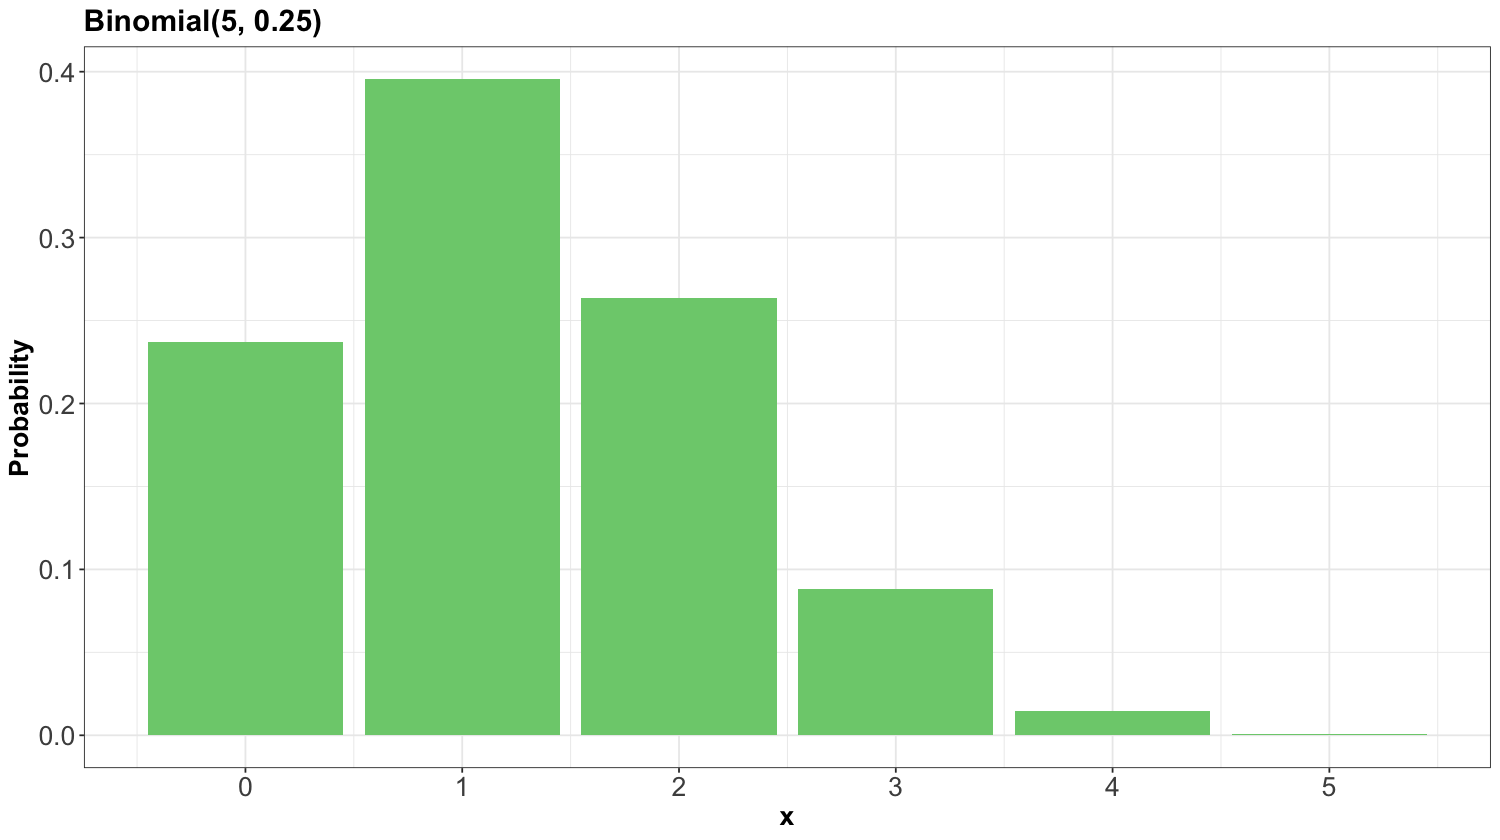

In [6]:
tibble(x = 0:5, Probability = dbinom(x, size = 5, prob = 0.25)) %>%
  ggplot(aes(x, Probability)) +
  geom_col(fill = "palegreen3") +
  ggtitle("Binomial(5, 0.25)") +
  theme_bw() +
  scale_x_continuous(breaks = 0:5) +
  theme(plot.title = element_text(size = 18, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"))

Specifying a value for both $p$ and $n$ results in a unique Binomial distribution. For example, the $\text{Binomial}(n = 5, p = 0.25)$ distribution is plotted above. It is helpful to remember that there are, in fact, **many Binomial distributions** (actually infinite!), one for each choice of $p$ and $n$. We refer to the entire set of probability distributions as the **Binomial family of distributions**. 


```{admonition} Note
:class: warning
It does not actually make sense to talk about "one" Binomial distribution! This is important to remember as we add concepts throughout MDS, such as the maximum likelihood estimator you will see later on in this course.
```

### 3.4. Parameters

In the case of the Binomial distribution, knowing $p$ and $n$ is enough to know the entire distribution within the Binomial family. That is, no further information is needed -- we know all $n + 1$ probabilities based on only two numbers! Since $p$ and $n$ fully specify a Binomial distribution, we call them **parameters** of the Binomial family, and we call the Binomial family a **parametric family** of distributions. 

```{important} 
In general, a **parameter** is a variable whose specification narrows down the space of possible distributions (or, to be even more general, the space of possible models).
```

### 3.5. Parameterization

A Binomial distribution can be specified by knowing $n$ and $p$, but there are other ways we can specify the distribution. For instance, specifying the mean and variance is enough to identify a Binomial distribution. 

Exactly which variables we decide to use to identify a distribution within a family is called the family's **parameterization**. So, the Binomial distribution is usually **parameterized** according to $n$ and $p$, but could also be parameterized in terms of the mean and variance. A distribution family's "usual" parameterization is sometimes called the **canonical parameterization**.

In general, there are many ways in which a distribution family can be parameterized. The parameterization you use in practice will depend on the information you can more easily obtain.

### 3.6. Distribution Families in Practice

> Why is it useful to know about distribution families?

In general, when we are modelling something, like a river flow, next month's net gains, or the number of ships arriving at port tomorrow, we have the choice to make a distributional assumption or not. That is:

- Do we want to declare the random variable of interest as belonging to a specific distribution family? 
- Or, do we want to allow the random variable to have a fully general distribution? 

Of course, both are good options depending on the scenario, and later in the program, we will explore the tradeoff with both options in more detail.

## 4. Another Common Discrete Distribution Families

Aside from the Binomial family of distributions, many other families come up in practice. Here are some of them. For a complete list, check out [Wikipedia's list of probability distributions](https://en.wikipedia.org/wiki/List_of_probability_distributions). In practice, it is rare to encounter situations that a distribution family exactly describes, but distribution families still act as useful approximations.

### 4.1. [Geometric Distribution](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Geometric.pdf)

#### Process

Suppose you play a game, and win with probability $p$. Let $X$ be the number of **independent** failures at playing the game before experiencing the first **independent** win. Then $X$ is said to have a **Geometric distribution**, written as

$$X \sim \text{Geometric} (p).$$

#### PMF

A Geometric distribution is characterized by the PMF 

$$P(X = x \mid p) = p (1 - p)^x  \quad \text{for} \quad x = 0, 1, \dots$$

```{important} 
Note the following:

- Sometimes this family is defined so that $X$ **includes** the winning attempt. The properties of the distribution differ, so be sure to be deliberate about which one you use. 
- Since there is only one parameter, this means that if you know the mean, you also know the variance!
- The Geometric distribution has **infinite support**, or in other words infinitely many possible outcomes. We can still place a non-zero probability on each outcome and have the probabilities sum to 1 thanks to [convergent series](https://en.wikipedia.org/wiki/Convergent_series).
```

#### Mean

The mean of a Geometric random variable is defined as:

$$\mathbb{E}(X) = \frac{1 - p}{p}.$$

#### Variance

The variance of a Geometric random variable is defined as:

$$\text{Var}(X) = \frac{1 - p}{p^2}.$$

#### Code

The Geometric PMF can be calculated in `R` with `dgeom()` and in `Python` with `scipy.stats.geom()`.

### 4.2. [Negative Binomial Distribution (a.k.a. Pascal)](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Geometric.pdf)

#### Process

Suppose you play a game, and win with probability $p$. Let $X$ be the number of **independent** losses at playing the game before experiencing $k$ **independent** wins. Then $X$ is said to have a **Negative Binomial** distribution, written as

$$X \sim \text{Negative Binomial} (k, p).$$

#### PMF

A Negative Binomial distribution is characterized by the PMF

$$P(X = x \mid k, p) = {k - 1 + x \choose x} p^k (1 - p)^x  \quad \text{for} \quad x = 0, 1, \dots$$

```{important} 
Note the following:

- It has two parameters: $k$ and $p$.
- The Geometric family results with $k = 1$.
```

#### Mean

The mean of a Negative Binomial random variable is defined as:

$$\mathbb{E}(X) = \frac{k(1 - p)}{p}.$$

#### Variance

The variance of a Negative Binomial random variable is defined as:

$$\text{Var}(X) = \frac{k(1 - p)}{p^2}.$$

#### Code

The Negative Binomial PMF can be calculated in `R` with `dnbinom()` and in `Python` with `scipy.stats.nbinom`.

### 4.3. [Poisson](http://www.math.wm.edu/~leemis/chart/UDR/PDFs/Poisson.pdf)

#### Process

Suppose customers independently arrive at a store at some average rate $\lambda$. Then, the total number $X$ of customers arriving after a pre-specified length of time follows a **Poisson distribution**:

$$X \sim \text{Poisson} (\lambda).$$

```{important} 
Note this distribution is parameterized by a single parameter: the mean $\lambda$. We can find other examples that are indicative of a Poisson process:

- The number of ships arriving at Vancouver port on a given day.
- The number of emails you receive on a given day.
```

#### PMF

A Poisson distribution is characterized by the PMF

$$P(X = x \mid \lambda) = \frac{\lambda^x \exp(-\lambda)}{x!}  \quad \text{for} \quad x = 0, 1, \dots$$

#### Mean

The mean of a Poisson random variable is defined as:

$$\mathbb{E}(X) = \lambda.$$

#### Variance

The variance of a Poisson random variable is defined as:

$$\text{Var}(X) = \lambda.$$

```{important} 
A notable property of this family is that the mean is equal to the variance.
```

#### Code

The Poisson PMF can be calculated in `R` with `dpois()` and in `Python` with `scipy.stats.poisson()`.